# IMPORTING REQUIRED LIBRARIES

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# INSERT DATA

In [67]:
df = pd.read_csv('/content/Copy of Dataset .csv')

# DATA PROCESSING

In [68]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [69]:
df.shape

(4411, 21)

In [70]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3.0,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3.0,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4.0,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4.0,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4.0,4.8,Dark Green,Excellent,229.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         4411 non-null   int64  
 1   Restaurant Name       4411 non-null   object 
 2   Country Code          4411 non-null   int64  
 3   City                  4411 non-null   object 
 4   Address               4411 non-null   object 
 5   Locality              4411 non-null   object 
 6   Locality Verbose      4411 non-null   object 
 7   Longitude             4411 non-null   float64
 8   Latitude              4411 non-null   float64
 9   Cuisines              4401 non-null   object 
 10  Average Cost for two  4410 non-null   float64
 11  Currency              4410 non-null   object 
 12  Has Table booking     4410 non-null   object 
 13  Has Online delivery   4410 non-null   object 
 14  Is delivering now     4410 non-null   object 
 15  Switch to order menu 

In [72]:
df.isnull().sum()

Restaurant ID            0
Restaurant Name          0
Country Code             0
City                     0
Address                  0
Locality                 0
Locality Verbose         0
Longitude                0
Latitude                 0
Cuisines                10
Average Cost for two     1
Currency                 1
Has Table booking        1
Has Online delivery      1
Is delivering now        1
Switch to order menu     1
Price range              1
Aggregate rating         1
Rating color             1
Rating text              1
Votes                    1
dtype: int64

In [73]:
df.dropna(inplace=True)

In [74]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [75]:
df.duplicated().sum()

0

In [76]:
# City

In [77]:
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras�_lia', 'Rio de Janeiro', 'S��o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentham East', '

In [78]:
df['City'] = df['City'].apply(lambda x:x.replace('Bras�_lia','Bras_lia'))
df['City'] = df['City'].apply(lambda x:x.replace('S��o Paulo','Sao Paul'))
df['City'] = df['City'].apply(lambda x:x.replace('��stanbul','Istanbul'))
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras_lia', 'Rio de Janeiro', 'Sao Paul', 'Albany',
       'Armidale', 'Athens', 'Augusta', 'Balingup', 'Beechworth', 'Boise',
       'Cedar Rapids/Iowa City', 'Chatham-Kent', 'Clatskanie', 'Cochrane',
       'Columbus', 'Consort', 'Dalton', 'Davenport', 'Des Moines',
       'Dicky Beach', 'Dubuque', 'East Ballina', 'Fernley', 'Flaxton',
       'Forrest', 'Gainesville', 'Hepburn Springs', 'Huskisson',
       'Inverloch', 'Lakes Entrance', 'Lakeview', 'Lincoln', 'Lorn',
       'Macedon', 'Macon', 'Mayfield', 'Mc Millan', 'Middleton Beach',
       'Monroe', 'Montville', 'Ojo Caliente', 'Orlando', 'Palm Cove',
       'Paynesville', 'Penola', 'Pensacola', 'Phillip Island',
       'Pocatello', 'Potrero', 'Princeton', 'Rest of Hawaii', 'Savannah',
       'Singapore', 'Sioux City', 'Tampa Bay', 'Tanunda', 'Trentham East',
       'Val

In [79]:
# Address

In [80]:
df['Address'].unique()

array(['Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City',
       'Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City',
       'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City', ...,
       'Opposite Deshbandhu College, Krishna Market, Kalkaji, New Delhi',
       '10 & 12, F-7, Main Road, Kalkaji, New Delhi',
       '59-60, Mini Central Market, Near Mother Dairy, Kalkaji, New Delhi'],
      dtype=object)

In [81]:
df['Address'] = df['Address'].apply(lambda x:x.replace(',',' '))
df['Address'] = df['Address'].apply(lambda x:x.replace('Kuru�_e��me','Kuru'))
df['Address'] = df['Address'].apply(lambda x:x.replace('Be��ikta��  ��stanbul','Beşiktaş Istanbul'))
df['Address'] = df['Address'].apply(lambda x:x.replace('Cafea��a Mahallesi  Bademalt۱ Sokak  No 21/B  Kad۱k�_y  ��stanbul','Caferaga Mahallesi Bademalti Sokak No 21/B 34710 Kadikoy/Istanbul'))
df['Address'].unique()

array(['Third Floor  Century City Mall  Kalayaan Avenue  Poblacion  Makati City',
       'Little Tokyo  2277 Chino Roces Avenue  Legaspi Village  Makati City',
       'Edsa Shangri-La  1 Garden Way  Ortigas  Mandaluyong City', ...,
       'Opposite Deshbandhu College  Krishna Market  Kalkaji  New Delhi',
       '10 & 12  F-7  Main Road  Kalkaji  New Delhi',
       '59-60  Mini Central Market  Near Mother Dairy  Kalkaji  New Delhi'],
      dtype=object)

In [82]:
# Locality

In [83]:
df['Locality'].unique()

array(['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City',
       'SM Megamall, Ortigas, Mandaluyong City',
       'SM by the Bay, Mall of Asia Complex, Pasay City',
       'Sofitel Philippine Plaza Manila, Pasay City', 'Kapitolyo',
       'UP Town Center, Diliman, Quezon City', 'Addition Hills',
       'Little Baguio', 'Nuvali, Don Jose, Santa Rosa',
       'Solenad 3, Don Jose, Santa Rosa', 'Tagaytay City',
       'BGC Stopover Pavillion, Bonifacio Global City',
       'Bonifacio Global City',
       'SM Aura Premier, Bonifacio Global City, Taguig City', 'Asa Norte',
       'Asa Sul', '�guas Claras', 'Bras�_lia Shopping, Asa Norte',
       'Lago Sul', 'ParkShopping, Guar�� I', 'Pont��o Lago Sul, Lago Sul',
       'Setor De Clubes Esportivos Sul', 'Shopping Iguatemi, Lago Norte',
       'Sudoeste', 'Barra da Tijuca', 'Centro', 'Copacabana',
       'Galeria River, Copacabana', 'G��vea', '

In [84]:
df['Locality'] = df['Locality'].apply(lambda x:x.replace(',',''))
df['Locality'] = df['Locality'].apply(lambda x:x.replace('Ko��uyolu','Koy Yolu'))
df['Locality'] = df['Locality'].apply(lambda x:x.replace('Ko��uyolu','Koy Yolu'))

df['Locality'].unique()

array(['Century City Mall Poblacion Makati City',
       'Little Tokyo Legaspi Village Makati City',
       'Edsa Shangri-La Ortigas Mandaluyong City',
       'SM Megamall Ortigas Mandaluyong City',
       'SM by the Bay Mall of Asia Complex Pasay City',
       'Sofitel Philippine Plaza Manila Pasay City', 'Kapitolyo',
       'UP Town Center Diliman Quezon City', 'Addition Hills',
       'Little Baguio', 'Nuvali Don Jose Santa Rosa',
       'Solenad 3 Don Jose Santa Rosa', 'Tagaytay City',
       'BGC Stopover Pavillion Bonifacio Global City',
       'Bonifacio Global City',
       'SM Aura Premier Bonifacio Global City Taguig City', 'Asa Norte',
       'Asa Sul', '�guas Claras', 'Bras�_lia Shopping Asa Norte',
       'Lago Sul', 'ParkShopping Guar�� I', 'Pont��o Lago Sul Lago Sul',
       'Setor De Clubes Esportivos Sul', 'Shopping Iguatemi Lago Norte',
       'Sudoeste', 'Barra da Tijuca', 'Centro', 'Copacabana',
       'Galeria River Copacabana', 'G��vea', 'Ipanema', 'Lagoa',
      

In [85]:
# Locality Verbose

In [86]:
df['Locality Verbose'].unique()

array(['Century City Mall, Poblacion, Makati City, Makati City',
       'Little Tokyo, Legaspi Village, Makati City, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City',
       'SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City',
       'SM by the Bay, Mall of Asia Complex, Pasay City, Pasay City',
       'Sofitel Philippine Plaza Manila, Pasay City, Pasay City',
       'Kapitolyo, Pasig City',
       'UP Town Center, Diliman, Quezon City, Quezon City',
       'Addition Hills, San Juan City', 'Little Baguio, San Juan City',
       'Nuvali, Don Jose, Santa Rosa, Santa Rosa',
       'Solenad 3, Don Jose, Santa Rosa, Santa Rosa',
       'Tagaytay City, Tagaytay City',
       'BGC Stopover Pavillion, Bonifacio Global City, Taguig City',
       'Bonifacio Global City, Taguig City',
       'SM Aura Premier, Bonifacio Global City, Taguig City, Taguig City',
       'Asa Norte, Bras�_lia', 'Asa Sul, Bras�_lia',
       '�guas Claras, Bras�_lia',
       'Bra

In [87]:
df['Locality Verbose'] = df['Locality Verbose'].apply(lambda x:x.replace(',',''))
df['Locality Verbose'] = df['Locality Verbose'].apply(lambda x:x.replace('Ko��uyolu ��stanbul','Koy Yolu Istanbul'))
df['Locality Verbose'] = df['Locality Verbose'].apply(lambda x:x.replace('Kuru�_e��me ��stanbul','kurucesme Istanbul'))
df['Locality Verbose'] = df['Locality Verbose'].apply(lambda x:x.replace('��stanbul','Istanbul'))
df['Locality Verbose'] = df['Locality Verbose'].apply(lambda x:x.replace('��stanbul','Istanbul'))
df['Locality Verbose'].unique()

array(['Century City Mall Poblacion Makati City Makati City',
       'Little Tokyo Legaspi Village Makati City Makati City',
       'Edsa Shangri-La Ortigas Mandaluyong City Mandaluyong City',
       'SM Megamall Ortigas Mandaluyong City Mandaluyong City',
       'SM by the Bay Mall of Asia Complex Pasay City Pasay City',
       'Sofitel Philippine Plaza Manila Pasay City Pasay City',
       'Kapitolyo Pasig City',
       'UP Town Center Diliman Quezon City Quezon City',
       'Addition Hills San Juan City', 'Little Baguio San Juan City',
       'Nuvali Don Jose Santa Rosa Santa Rosa',
       'Solenad 3 Don Jose Santa Rosa Santa Rosa',
       'Tagaytay City Tagaytay City',
       'BGC Stopover Pavillion Bonifacio Global City Taguig City',
       'Bonifacio Global City Taguig City',
       'SM Aura Premier Bonifacio Global City Taguig City Taguig City',
       'Asa Norte Bras�_lia', 'Asa Sul Bras�_lia',
       '�guas Claras Bras�_lia', 'Bras�_lia Shopping Asa Norte Bras�_lia',
       '

# DATA VISUALIZATION

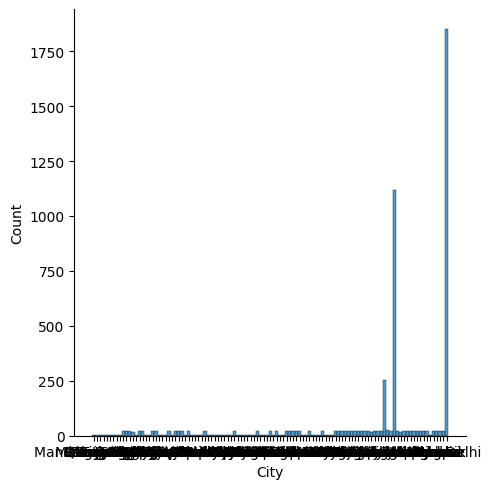

In [88]:
# Displot graph
sns.displot(df['City'])

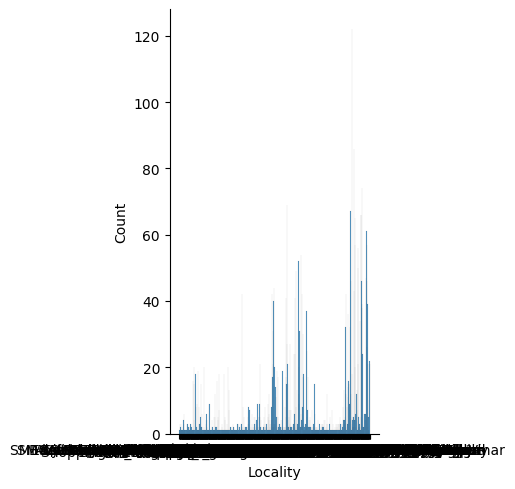

In [89]:
# Displot graph
sns.displot(df['Locality'])

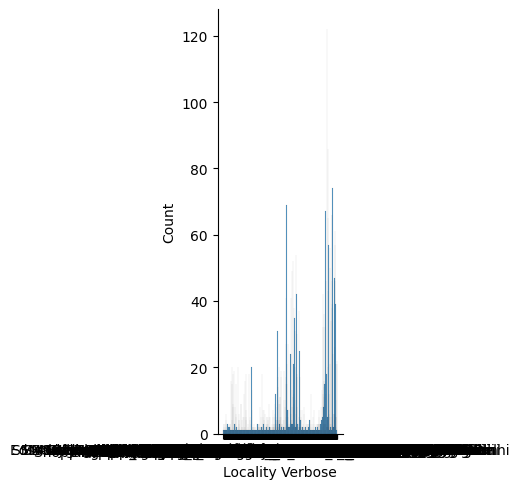

In [90]:
# Displot graph
sns.displot(df['Locality Verbose'])

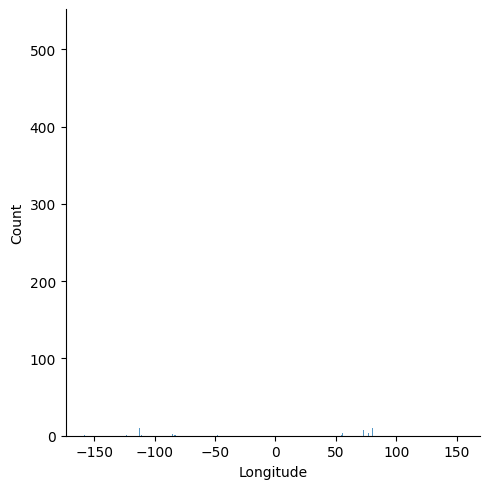

In [91]:
# Displot graph
sns.displot(df['Longitude'])

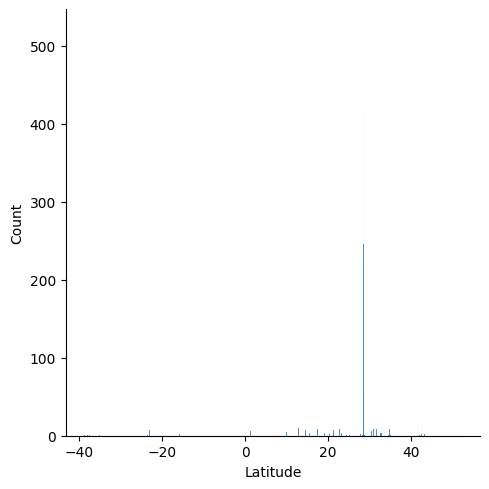

In [92]:
# Displot graph
sns.displot(df['Latitude'])

<ipython-input-93-44b981da70e5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True) #heatmap


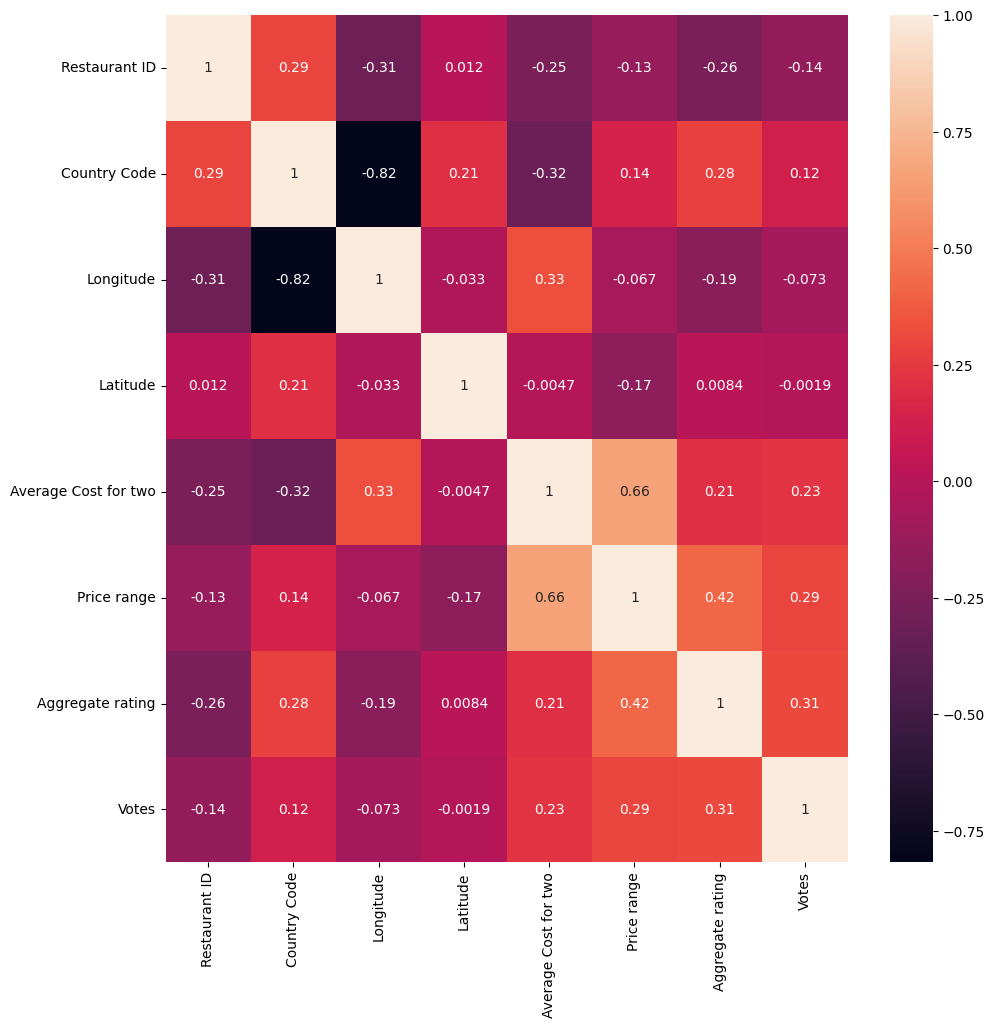

In [93]:
# Heat Map
plt.figure(figsize = (11,11))
sns.heatmap(df.corr(), annot = True) #heatmap
plt.show()

# IMPLEMENTING ML MODEL

In [94]:
y = df['Locality']

In [95]:
X = df['Votes']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
y_train

1778                         Sector 15
1229          Cyber Hub DLF Cyber City
44                          Copacabana
292                            Flaxton
2495                             Powai
                     ...              
3453    DLF Promenade Mall Vasant Kunj
475                    Victoria Rochor
3101                   Connaught Place
3781                        Green Park
869                    Badarpur Border
Name: Locality, Length: 3520, dtype: object

In [99]:
y_test

277                          Dubuque
3440            DLF Place Mall Saket
4030                      India Gate
1036                       Sector 37
1598                Old Railway Road
                    ...             
1041                       Sector 37
3290      Delhi University-GTB Nagar
536                         Valdosta
1209    Cross Point Mall DLF Phase 4
125                          Augusta
Name: Locality, Length: 881, dtype: object

In [100]:
X_train

1778       4.0
1229     701.0
44        24.0
292       37.0
2495    3244.0
         ...  
3453     154.0
475       33.0
3101    1942.0
3781      51.0
869        7.0
Name: Votes, Length: 3520, dtype: float64

In [101]:
X_test

277      74.0
3440     71.0
4030     13.0
1036      1.0
1598     25.0
        ...  
1041      0.0
3290     51.0
536     225.0
1209    364.0
125     631.0
Name: Votes, Length: 881, dtype: float64

# APPLYING MODELS

Random Forest
Logistic regression

In [102]:
X = df['Votes']
y = df['Locality']

X_train = X_train.to_numpy()
X_train = X_train.reshape(-1, 1)

X_train = pd.DataFrame(X_train)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features (X) and labels (y)
X = df.drop('Locality', axis=1)  # Adjust 'label_column' with your actual label column name
y = df['Votes']
X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=30)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.21
